# HW1: Linear Regression using Gradient Descent


## Imports

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

## Load data

In [2]:
train_df = pd.read_csv("./data/train_data.csv")
x_train, y_train = train_df['x_train'], train_df['y_train']

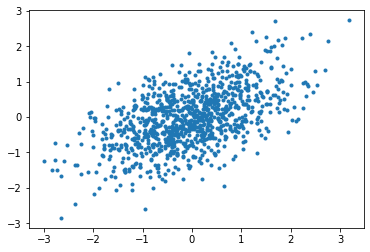

In [3]:
plt.plot(x_train, y_train, '.')

## Common Function
Define some useful function for mean square error solution and mean absolute error solution.

In [4]:
def model(w, x):
    return x.dot(w)

def add_bias(x):
    return np.insert(np.expand_dims(x, axis=1), 0, 1, axis=1)

## Mean Square Error

In [5]:
it = 100
lr = 1e-4
w_mse = np.random.rand(2)

def cal_mse(p, p_hat):
    return np.sum(np.square(np.subtract(p, p_hat))) / len(p)

In [6]:
mses = []

for i in range(it):
    pred = model(w_mse, add_bias(x_train))
    mse = cal_mse(pred, y_train)
    mses.append(mse)
    grad = np.dot(np.subtract(pred, y_train), add_bias(x_train))
    w_mse = w_mse - lr * grad

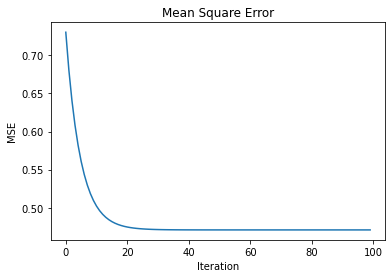

In [7]:
plt.title('Mean Square Error')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.plot(mses)

The weight(B1) is 0.4527421065505252, and the intercept(B0) is -0.0012522663428359007.


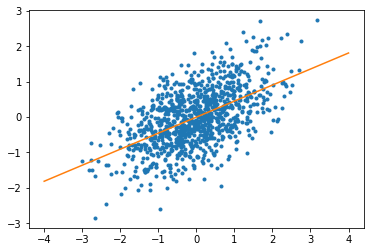

In [8]:
x = np.linspace(-4, 4, 1000)
plt.plot(x_train, y_train, '.')
plt.plot(x, w_mse[0] + w_mse[1] * x)
print(f'The weight(B1) is {w_mse[1]}, and the intercept(B0) is {w_mse[0]}.')

## Mean Absolute Error

In [9]:
it = 100
lr = 0.05
c = 1e-10  # For approximate of the mae derivation

w_mae = np.random.rand(2)

def cal_mae(p, p_hat):
    return np.sum(np.absolute(np.subtract(p, p_hat))) / len(p)

In [10]:
maes = []

for i in range(it):
    pred = model(w_mae, add_bias(x_train))
    mae = cal_mae(pred, y_train)
    maes.append(mae)
    grad = np.dot(np.subtract(pred, y_train) / np.sum(np.sqrt(np.square(np.subtract(pred, y_train) + c))), add_bias(x_train))
    w_mae = w_mae - lr * grad

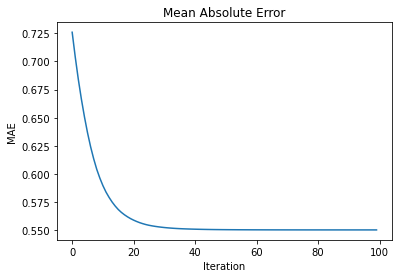

In [11]:
plt.title('Mean Absolute Error')
plt.xlabel('Iteration')
plt.ylabel('MAE')
plt.plot(maes)


The weight(B1) is 0.45274216636477577, and the intercept(B0) is -0.0012201033613230571.


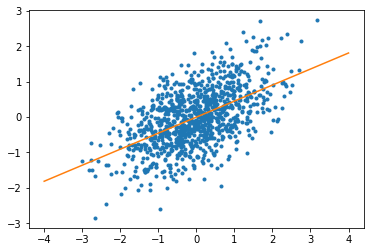

In [12]:
x = np.linspace(-4, 4, 1000)
plt.plot(x_train, y_train, '.')
plt.plot(x, w_mae[0] + w_mae[1] * x)
print(f'The weight(B1) is {w_mae[1]}, and the intercept(B0) is {w_mae[0]}.')

## Test the performance on the testing data
Inference the test data (x_test) and calculate the MSE and MAE of (y_test, y_pred).

In [13]:
test_data = pd.read_csv("./data/test_data.csv")
x_test, y_test = test_data['x_test'], test_data['y_test']

In [14]:
y_pred_mse = model(w_mse, add_bias(x_test))
y_pred_mae = model(w_mae, add_bias(x_test))
print(f'The MSE of testing data is {cal_mse(y_pred_mse, y_test)}, and the MAE of the testing data is {cal_mae(y_pred_mae, y_test)}')

The MSE of testing data is 0.4909018722711729, and the MAE of the testing data is 0.5613169795511651


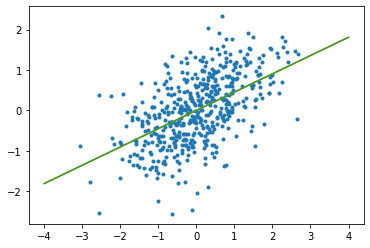

In [15]:
x = np.linspace(-4, 4, 1000)
plt.plot(x_test, y_test, '.')
plt.plot(x, w_mse[0] + w_mse[1] * x)
plt.plot(x, w_mae[0] + w_mae[1] * x)